# Final Project - Part 3 | Model

1. Identify and implement at least three different models.
    - Model choices must include at least one supervised and one unsupervised learning model.
    
2. The business objective can vary for supervised versus unsupervised model.

3. For each model prepare a report showing 
    - results obtained and hyperparameter values used
    - justification for dimensionality reduction (or not) including supporting data
    - resulting conclusions for each model regarding potential fit. 

# Approach

Part 3 of our final project will see implementations of three different approaches to solving the underlying questions on investment timing for TQQQ. First, before seeking the different methods on answering the question, I would like to restate the goal of our ML models. That is, to appropriately time the long, short, or hold of the TQQQ ETF. Although perfect market timing is impossible to achieve, according to the Efficient Market Hypothesis. Below will outline the expectations for each of the models and how I believe that these methods might accomplish more efficient entries and exits into the market.

# Data Retrieval and Prep

In [34]:
# required packages
import pandas as pd
import numpy as np
from data_etl import execute_etl
import copy

import tensorflow as tf
from sklearn.model_selection import train_test_split

In [35]:
# upload required data 
df = execute_etl('2010-12-31', '2024-02-29', 'TQQQ')
df_copy = copy.deepcopy(df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [36]:
# review columns in the dataframe
df_copy.columns.values

array(['Date', 'TQQQ_close', 'TQQQ_volume', 'TQQQ_ret', 'tbf_close',
       'tbf_volume', 'tbf_ret', 'tip_close', 'tip_volume', 'tip_ret',
       'uup_close', 'uup_volume', 'uup_ret', 'vixy_close', 'vixy_volume',
       'vixy_ret', 'uso_close', 'uso_volume', 'uso_ret', 'gld_close',
       'gld_volume', 'gld_ret', 'TQQQ_35_day_ema', 'TQQQ_200_day_sma',
       'TQQQ_macd', 'TQQQ_macd_signal', 'TQQQ_rsi', 'decision', 'cash',
       'cash_ret', 'initial_hold_days', 'hold_countdown',
       'TQQQ_1_day_close', 'TQQQ_3_day_close', 'TQQQ_5_day_close',
       'TQQQ_10_day_close', 'TQQQ_20_day_close'], dtype=object)

In [37]:
# review head of data
df_copy

,Date,TQQQ_close,TQQQ_volume,TQQQ_ret,tbf_close,tbf_volume,tbf_ret,tip_close,tip_volume,tip_ret,...,decision,cash,cash_ret,initial_hold_days,hold_countdown,TQQQ_1_day_close,TQQQ_3_day_close,TQQQ_5_day_close,TQQQ_10_day_close,TQQQ_20_day_close
0,2011-10-18,0.795722,142896000,0.036270,30.712297,938000,0.006303,86.385406,648900,0.004817,...,hold,4.275679e+00,0.036270,20,1,0.749844,0.766656,0.768378,0.727563,0.786911
1,2011-10-19,0.749844,121123200,-0.057656,30.721460,310900,0.000298,86.249855,525700,-0.001569,...,long,4.029160e+00,-0.057656,3,3,0.740324,0.814559,0.765339,0.745489,0.748122
2,2011-10-20,0.740324,101587200,-0.012696,30.932129,374400,0.006857,86.264870,599800,0.000174,...,hold,3.978005e+00,-0.012696,3,2,0.766656,0.768378,0.827016,0.790861,0.696675
3,2011-10-21,0.766656,94214400,0.035569,31.252716,286100,0.010364,86.174553,525500,-0.001047,...,hold,4.119497e+00,0.035569,3,1,0.814559,0.765339,0.829751,0.778606,0.679964
4,2011-10-24,0.814559,98678400,0.062484,31.216076,345500,-0.001172,86.430573,636500,0.002971,...,long,4.376898e+00,0.062484,3,3,0.768378,0.827016,0.788633,0.795924,0.640466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,2024-01-24,56.117512,89859300,0.016423,23.338676,360500,0.005991,106.405571,1282300,-0.002343,...,hold,6.242639e+11,0.016423,20,1,56.276936,56.864815,52.450745,58.100361,59.953671
3086,2024-01-25,56.276936,75697600,0.002841,23.209623,671500,-0.005530,106.765350,1717800,0.003381,...,long,6.260374e+11,0.002841,20,20,55.240677,55.728916,54.304058,58.339497,59.405647
3087,2024-01-26,55.240677,64191300,-0.018414,23.249332,173100,0.001711,106.665413,1706300,-0.000936,...,hold,6.145098e+11,-0.018414,20,19,56.864815,52.450745,57.034206,60.053310,59.325935
3088,2024-01-29,56.864815,57988600,0.029401,23.001154,278300,-0.010675,107.135124,1275600,0.004404,...,hold,6.325771e+11,0.029401,20,18,55.728916,54.304058,56.745251,59.345867,59.694607


In [38]:
# using the date index for standardizing the data
df_date_idx = df_copy.set_index('Date')

In [39]:
# seperate dataframes between those being used for RNN, XGBoost, and KMeans

# cols to remove for rnn
rmv_cols_rnn = [
    'decision',
    'cash',
    'cash_ret',
    'initial_hold_days',
    'hold_countdown'
]
df_rnn = df_date_idx.drop(columns=rmv_cols_rnn)

# cols to remove for xgboost
rmv_cols_xgboost = [
    'cash',
    'cash_ret',
    'initial_hold_days',
    'hold_countdown',
    'TQQQ_1_day_close',
    'TQQQ_3_day_close',
    'TQQQ_5_day_close',
    'TQQQ_10_day_close',
    'TQQQ_20_day_close'
]
df_xgboost = df_date_idx.drop(columns=rmv_cols_xgboost)

# cols to remove for kmeans
rmv_cols_kmeans = [
    'decision',
    'cash',
    'cash_ret',
    'initial_hold_days',
    'hold_countdown',
    'TQQQ_1_day_close',
    'TQQQ_3_day_close',
    'TQQQ_5_day_close',
    'TQQQ_10_day_close',
    'TQQQ_20_day_close'
]
df_kmeans = df_date_idx.drop(columns=rmv_cols_kmeans)

In [40]:
# set x and y for rnn
x_rnn = df_rnn.iloc[:, :-5]
y_rnn = df_rnn.iloc[:, -5:]

# list with column names 
x_rnn_cols = list(x_rnn.columns.values)
y_rnn_cols = list(y_rnn.columns.values)

# set x and y for xgboost
x_xgboost = df_xgboost.iloc[:, :-1]
y_xgboost = df_xgboost.iloc[:, -1:]

# list with column names
x_xgboost_cols = list(x_xgboost.columns.values)
y_xgboost_cols = list(y_xgboost.columns.values)

# kmeans does not require any seperation for x and y because we do not have a y value to predict

# RNN Timeseries Market Data

Through RNN, we are attempting to achieve predictions for 3, 5, 10, and 20 day future prices of the security. This approach will then allow us to use the investment function to decide how we will time our investment. These times investments for 3, 5, 10, and 20 days will be our dependent variables that we will attempt to predict using our independent variables.

## Preparing The Data

### Splitting Between Train and Test Sets

In [41]:
# splitting data between train and test sets
x_rnn_train = x_rnn[x_rnn.index < '2021-06-30']
x_rnn_test = x_rnn[x_rnn.index >= '2021-06-30']

y_rnn_train = y_rnn[y_rnn.index < '2021-06-30']
y_rnn_test = y_rnn[y_rnn.index >= '2021-06-30']

### Standardize and/or Normalize

Becuase we are using time series data, the best apporach for standardization will be using min-max scaling but on a rolling day window. Right now we can make assumptions as to what rolling window might work best. However, I believe the best approach may be to test at least three rolling windows. Becuase there are only about 20 trading days each month, we will assume that 20 days is one month. We will test 1 , 3 and 6 month rolling windows to determine the best results.

#### Rolling and Reverse Rolling Window Function

In [42]:
def rolling_window_scaling_and_save(series, window):
    '''
    Function used to normalize data, using min-max scalling, based on 
    user defined rolling window.

    Input:
        - series: dataframe defined as the dependent or independent variables.
        - window: rolling window period

    Return: series containing the scaled data, series containing min values, series containing max values
    '''
    min_series = series.rolling(window=window, min_periods=window).min()
    max_series = series.rolling(window=window, min_periods=window).max()
    scaled_series = (series - min_series) / (max_series - min_series)
    
    return scaled_series, min_series, max_series


def apply_feature_scaling(window, x_rnn_train, y_rnn_train=0, training_set=False):
    '''
    Function used to apply the rolling_window_scaling_and_save function more intuitively
    to our dataframes.

    Input:
        - window: integer rolling window period
        - x_rnn_train: dataframe of the independent variables
        - y_rnn_train: dataframe of the dependent variables
        - training_set: boolean if True then we will apply scaling for x and y, if False, then only apply scaling to y.

    Return: four dataframes containing normalized features and the min-max values for each rolling period row
    '''
    if training_set == True:
        # new normalized placeholder and min/max value placeholder to recall from the normalization
        x_rnn_train_normalized = pd.DataFrame(index=x_rnn_train.index)
        x_rnn_train_min_max_values = pd.DataFrame(index=x_rnn_train.index)

        # y min_max values will be used to convert the normalized y back to the actual values
        y_rnn_train_normalized = pd.DataFrame(index=y_rnn_train.index)
        y_rnn_train_min_max_values = pd.DataFrame(index=y_rnn_train.index)

        # apply rolling window scaling to features and save min/max
        for feature in x_rnn_train.columns.values:
            x_rnn_train_normalized[f'{feature}_scaled'], x_rnn_train_min_max_values[f'{feature}_min'], x_rnn_train_min_max_values[f'{feature}_max'] = rolling_window_scaling_and_save(x_rnn_train[feature], window_size)

        for feature in y_rnn_train.columns.values:
            y_rnn_train_normalized[f'{feature}_scaled'], y_rnn_train_min_max_values[f'{feature}_min'], y_rnn_train_min_max_values[f'{feature}_max'] = rolling_window_scaling_and_save(y_rnn_train[feature], window_size)

        x_rnn_train_normalized.dropna(inplace=True)
        y_rnn_train_normalized.dropna(inplace=True)
        x_rnn_train_min_max_values.dropna(inplace=True)
        y_rnn_train_min_max_values.dropna(inplace=True)

        return x_rnn_train_normalized, x_rnn_train_min_max_values, y_rnn_train_normalized, y_rnn_train_min_max_values
    
    else:
        # new normalized placeholder and min/max value placeholder to recall from the normalization
        x_rnn_train_normalized = pd.DataFrame(index=x_rnn_train.index)
        x_rnn_train_min_max_values = pd.DataFrame(index=x_rnn_train.index)

        # apply rolling window scaling to features and save min/max
        for feature in x_rnn_train.columns.values:
            x_rnn_train_normalized[f'{feature}_scaled'], x_rnn_train_min_max_values[f'{feature}_min'], x_rnn_train_min_max_values[f'{feature}_max'] = rolling_window_scaling_and_save(x_rnn_train[feature], window_size)

        x_rnn_train_normalized.dropna(inplace=True)
        x_rnn_train_min_max_values.dropna(inplace=True)

        return x_rnn_train_normalized, x_rnn_train_min_max_values


def reverse_rolling_window_scaling(scaled_series, min_series, max_series):
    '''
    Function used to reverse the normalization of data, using min-max values
    which is created primarily to interperate the results of predictions.

    Input:
        - scaled_series: series 
        - min_series: series of min original values for scaled series
        - max_series: series of max original values for scaled series

    Return: series containing the scaled data, series containing min values, series containing max values
    '''
    original_series = scaled_series * (max_series - min_series) + min_series
    
    return original_series

#### 20 Day Rolling Window Scaling

In [44]:
# define window size
window_size = 20

# apply the feature scaling for trainand test data
x_rnn_train_normalized_20, x_rnn_train_min_max_values_20, y_rnn_train_normalized_20, y_rnn_train_min_max_values_20 = apply_feature_scaling(window_size, x_rnn_train, y_rnn_train, training_set=True)
x_rnn_test_normalized_20, x_rnn_test_min_max_values_20, y_rnn_test_normalized_20, y_rnn_test_min_max_values_20 = apply_feature_scaling(window_size, x_rnn_test, y_rnn_test, training_set=True)

#### 60 Day Rolling Window Scaling

In [45]:
# define window size
window_size = 60

# apply the feature scaling
x_rnn_train_normalized_60, x_rnn_train_min_max_values_60, y_rnn_train_normalized_60, y_rnn_train_min_max_values_60 = apply_feature_scaling(window_size, x_rnn_train, y_rnn_train, training_set=True)
x_rnn_test_normalized_60, x_rnn_test_min_max_values_60, y_rnn_test_normalized_60, y_rnn_test_min_max_values_60 = apply_feature_scaling(window_size, x_rnn_test, y_rnn_test, training_set=True)

#### 120 Day Rolling Window Scaling

In [46]:
# define window size
window_size = 120

# apply the feature scaling
x_rnn_train_normalized_120, x_rnn_train_min_max_values_120, y_rnn_train_normalized_120, y_rnn_train_min_max_values_120 = apply_feature_scaling(window_size, x_rnn_train, y_rnn_train, training_set=True)
x_rnn_test_normalized_120, x_rnn_test_min_max_values_120, y_rnn_test_normalized_120, y_rnn_test_min_max_values_120 = apply_feature_scaling(window_size, x_rnn_test, y_rnn_test, training_set=True)

#### Quick Note

In creating our rolling window we set the min_period to the size of the rolling window. This was done in order to capture more relevant details on the data. If it was not done then we would have had information at the very beginning of our dataset that did not entirely represent the rolling window period. Now, because of this min_period, we will need to remove rows that contain nan values. This is completed and accounted for in our apply_feature_scaling() function.

### Re-Shape for RNN

In order to shape our data accordingly for the RNN, we will note just a few things. 

- First, our RNN will have an input of 26 independent variable features and should output 5 dependent variable features (the features that we are predicting). 

- Second, we will use a sequence length that is equal to the length of our window size. This seems to be most appropriate considering the rolling window is what is used for normalizing the features in that feature length set. 

- Third, when applying this reshapping we will reshape our data to have $\text{x = [num samples, sequence length, num features]}$ and $\text{y = [num samples, num output features]}$

In [47]:
def re_shape_df(sequence_length, x_rnn_train_normalized, y_rnn_train_normalized=0, train_set=False):
    '''
    Reshapping the independent and dependent variable data to run in our RNN. If train_set is equal to False then
    that assumes that this re-shapping will be applied to make a prediction.

    Input:
        - sequence_length: integer value that represents the number of days which the RNN model will consider
        - x_rnn_train_normalized: dataframe containing our independent variables
        - y_rnn_train_normalized: dataframe containing our dependent varialbes
        - train_set: boolean indicating if re-shapping will be applied to a test set or to make predictions

    Return: reshapped X and y data
    '''

    # convert dataframe to np array if not already (for safe indexing)
    x_rnn_train_normalized = x_rnn_train_normalized.to_numpy() if hasattr(x_rnn_train_normalized, 'to_numpy') else x_rnn_train_normalized
    y_rnn_train_normalized = y_rnn_train_normalized.to_numpy() if hasattr(y_rnn_train_normalized, 'to_numpy') else y_rnn_train_normalized

    if train_set == True:
        # initialize the resulting X and y arrays for training the RNN
        X = np.zeros((len(x_rnn_train_normalized) - sequence_length, sequence_length, x_rnn_train_normalized.shape[1]))
        y = np.zeros((len(y_rnn_train_normalized) - sequence_length, y_rnn_train_normalized.shape[1]))

        for i in range(len(x_rnn_train_normalized) - sequence_length):
            X[i] = x_rnn_train_normalized[i:i+sequence_length]  # Shape [sequence_length, 26]
            y[i] = y_rnn_train_normalized[i + sequence_length - 1]  # Shape [5]

        print(f'shape of x: {X.shape}')
        print(f'shape of y: {y.shape}')

        return X, y

    else:
        # initialize the resulting X array for testing the RNN
        X = np.zeros((len(x_rnn_train_normalized) - sequence_length, sequence_length, len(x_rnn_train_normalized.columns)))

        for i in range(len(x_rnn_train_normalized) - sequence_length):
            X[i] = x_rnn_train_normalized[i:i+sequence_length]  # Shape [sequence_length, 26]

        print(f'shape of x train: {X.shape}')

        return X

#### 20 Day Reshape

In [48]:
x_rnn_train_reshape_20, y_rnn_train_reshape_20 = re_shape_df(20, x_rnn_train_normalized_20, y_rnn_train_normalized_20, train_set=True)
x_rnn_test_reshape_20, y_rnn_test_reshape_20 = re_shape_df(20, x_rnn_test_normalized_20, y_rnn_test_normalized_20, train_set=True)

shape of x: (2401, 20, 26)
shape of y: (2401, 5)
shape of x: (611, 20, 26)
shape of y: (611, 5)


#### 60 Day Reshape

In [49]:
x_rnn_train_reshape_60, y_rnn_train_reshape_60 = re_shape_df(60, x_rnn_train_normalized_60, y_rnn_train_normalized_60, train_set=True)
x_rnn_test_reshape_60, y_rnn_test_reshape_60 = re_shape_df(60, x_rnn_test_normalized_60, y_rnn_test_normalized_60, train_set=True)

shape of x: (2321, 60, 26)
shape of y: (2321, 5)
shape of x: (531, 60, 26)
shape of y: (531, 5)


#### 120 Day Reshape

In [50]:
x_rnn_train_reshape_120, y_rnn_train_reshape_120 = re_shape_df(120, x_rnn_train_normalized_120, y_rnn_train_normalized_120, train_set=True)
x_rnn_test_reshape_120, y_rnn_test_reshape_120 = re_shape_df(120, x_rnn_test_normalized_120, y_rnn_test_normalized_120, train_set=True)

shape of x: (2201, 120, 26)
shape of y: (2201, 5)
shape of x: (411, 120, 26)
shape of y: (411, 5)


## Initialize RNN Model

We will be initializing 3 seperate RNN models to test for normalization window of 20, 60, and 120 days.

#### RNN For 20 Day Look Back

In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from keras import backend as K
from tensorflow.keras.optimizers import Adam

K.clear_session()

model_20 = Sequential(name='LSTM_20_Day_Window')
model_20.add(
    LSTM(
        units=80, activation='tanh',
        input_shape=(x_rnn_train_reshape_20.shape[1], x_rnn_train_reshape_20.shape[2]),
        return_sequences=True
    )
)
model_20.add(
    Dropout(
        0.20
    )
)
model_20.add(
    LSTM(
        units=80, activation='tanh',
        input_shape=(x_rnn_train_reshape_20.shape[1], x_rnn_train_reshape_20.shape[2]),
        return_sequences=True
    )
)
model_20.add(
    Dropout(
        0.20
    )
)
model_20.add(
    LSTM(
        units=80, activation='tanh',
        input_shape=(x_rnn_train_reshape_20.shape[1], x_rnn_train_reshape_20.shape[2])
    )
)
model_20.add(
    Dropout(
        0.20
    )
)
model_20.add(
    Dense(
        5,
        activation='linear'
    )
)

model_20.compile(
    optimizer='adam',
    loss='mse'
)

# get a summary of model parameters
model_20.summary()

# train the model
model_20.fit(
    x_rnn_train_reshape_20,
    y_rnn_train_reshape_20,
    epochs=50,
    batch_size=28
)

# evaluate the model
performance_20 = model_20.evaluate(x_rnn_test_reshape_20, y_rnn_test_reshape_20)
print("Model performance: ", performance_20)

Model: "LSTM_20_Day_Window"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 80)         │        34,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 80)         │        51,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 80)             │        51,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,685 (537.83 KB)

 Trainable params: 137,685 (537.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1963
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1123
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1015
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0923
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0876
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0788
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0734
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0653
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0603
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0520
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0493
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0462
Epoch 13/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0424
Epoch 14/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0407
Epoch 15/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0396
Epoc

#### RNN For 60 Day Look Back

In [33]:
model_60 = Sequential(name='LSTM_60_Day_Window')
model_60.add(
    LSTM(
        units=80, activation='tanh',
        input_shape=(x_rnn_train_reshape_60.shape[1], x_rnn_train_reshape_60.shape[2]),
        return_sequences=True
    )
)
model_60.add(
    Dropout(
        0.20
    )
)
model_60.add(
    LSTM(
        units=80, activation='tanh',
        input_shape=(x_rnn_train_reshape_60.shape[1], x_rnn_train_reshape_60.shape[2]),
        return_sequences=True
    )
)
model_60.add(
    Dropout(
        0.20
    )
)
model_60.add(
    LSTM(
        units=80, activation='tanh',
        input_shape=(x_rnn_train_reshape_60.shape[1], x_rnn_train_reshape_60.shape[2])
    )
)
model_60.add(
    Dropout(
        0.20
    )
)
model_60.add(
    Dense(
        5,
        activation='linear'
    )
)

model_60.compile(
    optimizer='adam',
    loss='mse'
)

# get a summary of model parameters
model_60.summary()

# train the model
model_60.fit(
    x_rnn_train_reshape_60,
    y_rnn_train_reshape_60,
    epochs=50,
    batch_size=28
)

# evaluate the model
performance_60 = model_60.evaluate(x_rnn_test_reshape_60, y_rnn_test_reshape_60)
print("Model performance: ", performance_60)

Model: "LSTM_60_Day_Window"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 80)         │        34,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 80)         │        51,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 80)             │        51,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,685 (537.83 KB)

 Trainable params: 137,685 (537.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1478
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0634
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0544
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0476
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0402
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0320
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0288
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0245
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0242
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0213
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0211
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0192
Epoch 13/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0186
Epoch 14/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0168
Epoch 15/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0161
Epoc

#### RNN For 120 Day Look Back

In [34]:
model_120 = Sequential(name='LSTM_120_Day_Window')
model_120.add(
    LSTM(
        units=80, activation='tanh',
        input_shape=(x_rnn_train_reshape_120.shape[1], x_rnn_train_reshape_120.shape[2]),
        return_sequences=True
    )
)
model_120.add(
    Dropout(
        0.20
    )
)
model_120.add(
    LSTM(
        units=80, activation='tanh',
        input_shape=(x_rnn_train_reshape_120.shape[1], x_rnn_train_reshape_120.shape[2]),
        return_sequences=True
    )
)
model_120.add(
    Dropout(
        0.20
    )
)
model_120.add(
    LSTM(
        units=80, activation='tanh',
        input_shape=(x_rnn_train_reshape_120.shape[1], x_rnn_train_reshape_120.shape[2])
    )
)
model_120.add(
    Dropout(
        0.20
    )
)
model_120.add(
    Dense(
        5,
        activation='linear'
    )
)

model_120.compile(
    optimizer='adam',
    loss='mse'
)

# get a summary of model parameters
model_120.summary()

# fit the model
model_120.fit(
    x_rnn_train_reshape_120,
    y_rnn_train_reshape_120,
    epochs=50,
    batch_size=28
)

# evaluate the model
performance_120 = model_120.evaluate(x_rnn_test_reshape_120, y_rnn_test_reshape_120)
print("Model performance: ", performance_120)

Model: "LSTM_120_Day_Window"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 120, 80)        │        34,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 120, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120, 80)        │        51,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 80)             │        51,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,685 (537.83 KB)

 Trainable params: 137,685 (537.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.1384
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0419
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0353
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0305
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0263
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0216
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0200
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0178
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0175
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0161
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0147
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0145
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0136
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0126
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0129
Epoc

## Review Prediction Outcomes

In [35]:
import matplotlib.pyplot as plt

In [55]:
y_pred_20 = model_20.predict(x_rnn_test_reshape_20)
y_pred_60 = model_60.predict(x_rnn_test_reshape_60)
y_pred_120 = model_120.predict(x_rnn_test_reshape_120)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [56]:
# getting min max col values 
min_cols = [col for col in y_rnn_test_min_max_values_20.columns if 'min' in col]
max_cols = [col for col in y_rnn_test_min_max_values_20.columns if 'max' in col]

In [97]:
# un scaling the prediction results
y_pred_20_df = pd.DataFrame(y_pred_20, columns=y_rnn_cols)
y_pred_20_df_inv_scaled = reverse_rolling_window_scaling(y_pred_20, np.array(y_rnn_test_min_max_values_20[min_cols].iloc[-len(y_pred_20):]), np.array(y_rnn_test_min_max_values_20[max_cols].iloc[-len(y_pred_20):]))
y_pred_20_df_inv_scaled = pd.DataFrame(y_pred_20_df_inv_scaled, columns=y_rnn_cols)
y_pred_20_df_inv_scaled.set_index(y_rnn_test.index[-len(y_pred_20):], inplace=True)
y_pred_20_df_inv_scaled

,TQQQ_1_day_close,TQQQ_3_day_close,TQQQ_5_day_close,TQQQ_10_day_close,TQQQ_20_day_close
Date,,,,,
2021-08-25,66.551526,69.102661,69.794838,70.918003,72.078853
2021-08-26,68.351928,70.464779,70.374611,71.588896,73.137452
2021-08-27,70.976442,71.332321,71.258849,72.267211,73.505602
2021-08-30,71.085663,71.140414,71.367884,72.580657,72.921333
2021-08-31,71.598367,71.407736,71.233391,72.975697,72.383121
...,...,...,...,...,...
2024-01-24,54.107824,53.701890,49.937171,53.769662,57.844788
2024-01-25,55.119395,53.019333,48.526484,55.482820,58.430100
2024-01-26,56.239568,52.581575,48.948761,59.275076,59.180038


In [99]:
# un scaling the prediction results
y_pred_60_df = pd.DataFrame(y_pred_60, columns=y_rnn_cols)
y_pred_60_df_inv_scaled = reverse_rolling_window_scaling(y_pred_60, np.array(y_rnn_test_min_max_values_60[min_cols].iloc[-len(y_pred_60):]), np.array(y_rnn_test_min_max_values_60[max_cols].iloc[-len(y_pred_60):]))
y_pred_60_df_inv_scaled = pd.DataFrame(y_pred_60_df_inv_scaled, columns=y_rnn_cols)
y_pred_60_df_inv_scaled.set_index(y_rnn_test.index[-len(y_pred_60):], inplace=True)
y_pred_60_df_inv_scaled

,TQQQ_1_day_close,TQQQ_3_day_close,TQQQ_5_day_close,TQQQ_10_day_close,TQQQ_20_day_close
Date,,,,,
2021-12-17,72.135328,68.970597,67.253366,70.998890,74.406687
2021-12-20,69.747802,67.126671,66.272354,70.316162,72.343958
2021-12-21,68.079268,66.330038,67.791945,70.145983,70.136220
2021-12-22,67.207322,66.270491,68.234324,71.161348,66.134465
2021-12-23,66.439487,67.449944,68.097354,73.059208,65.685128
...,...,...,...,...,...
2024-01-24,55.629481,54.516165,53.006509,54.302646,59.576540
2024-01-25,54.660344,53.372835,52.264618,55.924076,59.605730
2024-01-26,53.948516,52.597974,52.383905,58.964094,59.702345


In [100]:
# un scaling the prediction results
y_pred_120_df = pd.DataFrame(y_pred_120, columns=y_rnn_cols)
y_pred_120_df_inv_scaled = reverse_rolling_window_scaling(y_pred_120, np.array(y_rnn_test_min_max_values_120[min_cols].iloc[-len(y_pred_120):]), np.array(y_rnn_test_min_max_values_120[max_cols].iloc[-len(y_pred_120):]))
y_pred_120_df_inv_scaled = pd.DataFrame(y_pred_120_df_inv_scaled, columns=y_rnn_cols)
y_pred_120_df_inv_scaled.set_index(y_rnn_test.index[-len(y_pred_120):], inplace=True)
y_pred_120_df_inv_scaled

,TQQQ_1_day_close,TQQQ_3_day_close,TQQQ_5_day_close,TQQQ_10_day_close,TQQQ_20_day_close
Date,,,,,
2022-06-10,56.336111,57.789618,57.774970,60.797355,55.973735
2022-06-13,55.119369,56.490645,57.426274,57.343636,56.478114
2022-06-14,53.742660,55.227674,57.355545,57.820531,56.810996
2022-06-15,52.180654,54.995608,57.726848,58.133269,57.226223
2022-06-16,51.509457,55.624881,58.659508,58.207350,57.987110
...,...,...,...,...,...
2024-01-24,55.370737,54.518154,53.004505,52.350523,57.567979
2024-01-25,54.801037,53.658933,52.177596,52.829902,57.220640
2024-01-26,54.452074,52.705789,51.624868,54.767104,56.839349


#### MSE of Un-Scaled Predicted Results

In [151]:
print(f'MSE for 20 day window, 1 day close: {((y_rnn_test.iloc[-len(y_pred_20_df_inv_scaled):, 0] - y_pred_20_df_inv_scaled.iloc[:, 0])**2).sum()/len(y_pred_20_df_inv_scaled)}')
print(f'MSE for 60 day window, 1 day close: {((y_rnn_test.iloc[-len(y_pred_60_df_inv_scaled):, 0] - y_pred_60_df_inv_scaled.iloc[:, 0])**2).sum()/len(y_pred_60_df_inv_scaled)}')
print(f'MSE for 120 day window, 1 day close: {((y_rnn_test.iloc[-len(y_pred_120_df_inv_scaled):, 0] - y_pred_120_df_inv_scaled.iloc[:, 0])**2).sum()/len(y_pred_120_df_inv_scaled)}\n')

print(f'MSE for 20 day window, 3 day close: {((y_rnn_test.iloc[-len(y_pred_20_df_inv_scaled):, 1] - y_pred_20_df_inv_scaled.iloc[:, 1])**2).sum()/len(y_pred_20_df_inv_scaled)}')
print(f'MSE for 60 day window, 3 day close: {((y_rnn_test.iloc[-len(y_pred_60_df_inv_scaled):, 1] - y_pred_60_df_inv_scaled.iloc[:, 1])**2).sum()/len(y_pred_60_df_inv_scaled)}')
print(f'MSE for 120 day window, 3 day close: {((y_rnn_test.iloc[-len(y_pred_120_df_inv_scaled):, 1] - y_pred_120_df_inv_scaled.iloc[:, 1])**2).sum()/len(y_pred_120_df_inv_scaled)}\n')

print(f'MSE for 20 day window, 5 day close: {((y_rnn_test.iloc[-len(y_pred_20_df_inv_scaled):, 2] - y_pred_20_df_inv_scaled.iloc[:, 2])**2).sum()/len(y_pred_20_df_inv_scaled)}')
print(f'MSE for 60 day window, 5 day close: {((y_rnn_test.iloc[-len(y_pred_60_df_inv_scaled):, 2] - y_pred_60_df_inv_scaled.iloc[:, 2])**2).sum()/len(y_pred_60_df_inv_scaled)}')
print(f'MSE for 120 day window, 5 day close: {((y_rnn_test.iloc[-len(y_pred_120_df_inv_scaled):, 2] - y_pred_120_df_inv_scaled.iloc[:, 2])**2).sum()/len(y_pred_120_df_inv_scaled)}\n')

print(f'MSE for 20 day window, 10 day close: {((y_rnn_test.iloc[-len(y_pred_20_df_inv_scaled):, 3] - y_pred_20_df_inv_scaled.iloc[:, 3])**2).sum()/len(y_pred_20_df_inv_scaled)}')
print(f'MSE for 60 day window, 10 day close: {((y_rnn_test.iloc[-len(y_pred_60_df_inv_scaled):, 3] - y_pred_60_df_inv_scaled.iloc[:, 3])**2).sum()/len(y_pred_60_df_inv_scaled)}')
print(f'MSE for 120 day window, 10 day close: {((y_rnn_test.iloc[-len(y_pred_120_df_inv_scaled):, 3] - y_pred_120_df_inv_scaled.iloc[:, 3])**2).sum()/len(y_pred_120_df_inv_scaled)}\n')

print(f'MSE for 20 day window, 20 day close: {((y_rnn_test.iloc[-len(y_pred_20_df_inv_scaled):, 4] - y_pred_20_df_inv_scaled.iloc[:, 4])**2).sum()/len(y_pred_20_df_inv_scaled)}')
print(f'MSE for 60 day window, 20 day close: {((y_rnn_test.iloc[-len(y_pred_60_df_inv_scaled):, 4] - y_pred_60_df_inv_scaled.iloc[:, 4])**2).sum()/len(y_pred_60_df_inv_scaled)}')
print(f'MSE for 120 day window, 20 day close: {((y_rnn_test.iloc[-len(y_pred_120_df_inv_scaled):, 4] - y_pred_120_df_inv_scaled.iloc[:, 4])**2).sum()/len(y_pred_120_df_inv_scaled)}')


MSE for 20 day window, 1 day close: 16.925797319177804
MSE for 60 day window, 1 day close: 56.90840368212068
MSE for 120 day window, 1 day close: 146.44257189873014

MSE for 20 day window, 3 day close: 21.913401620157416
MSE for 60 day window, 3 day close: 65.77001754171928
MSE for 120 day window, 3 day close: 154.03997608037412

MSE for 20 day window, 5 day close: 24.748914741201006
MSE for 60 day window, 5 day close: 68.71769165707836
MSE for 120 day window, 5 day close: 153.3826442125744

MSE for 20 day window, 10 day close: 29.234081421220523
MSE for 60 day window, 10 day close: 71.00086604095567
MSE for 120 day window, 10 day close: 157.61195836556382

MSE for 20 day window, 20 day close: 35.96691246769729
MSE for 60 day window, 20 day close: 113.6848935241561
MSE for 120 day window, 20 day close: 194.15887049742034


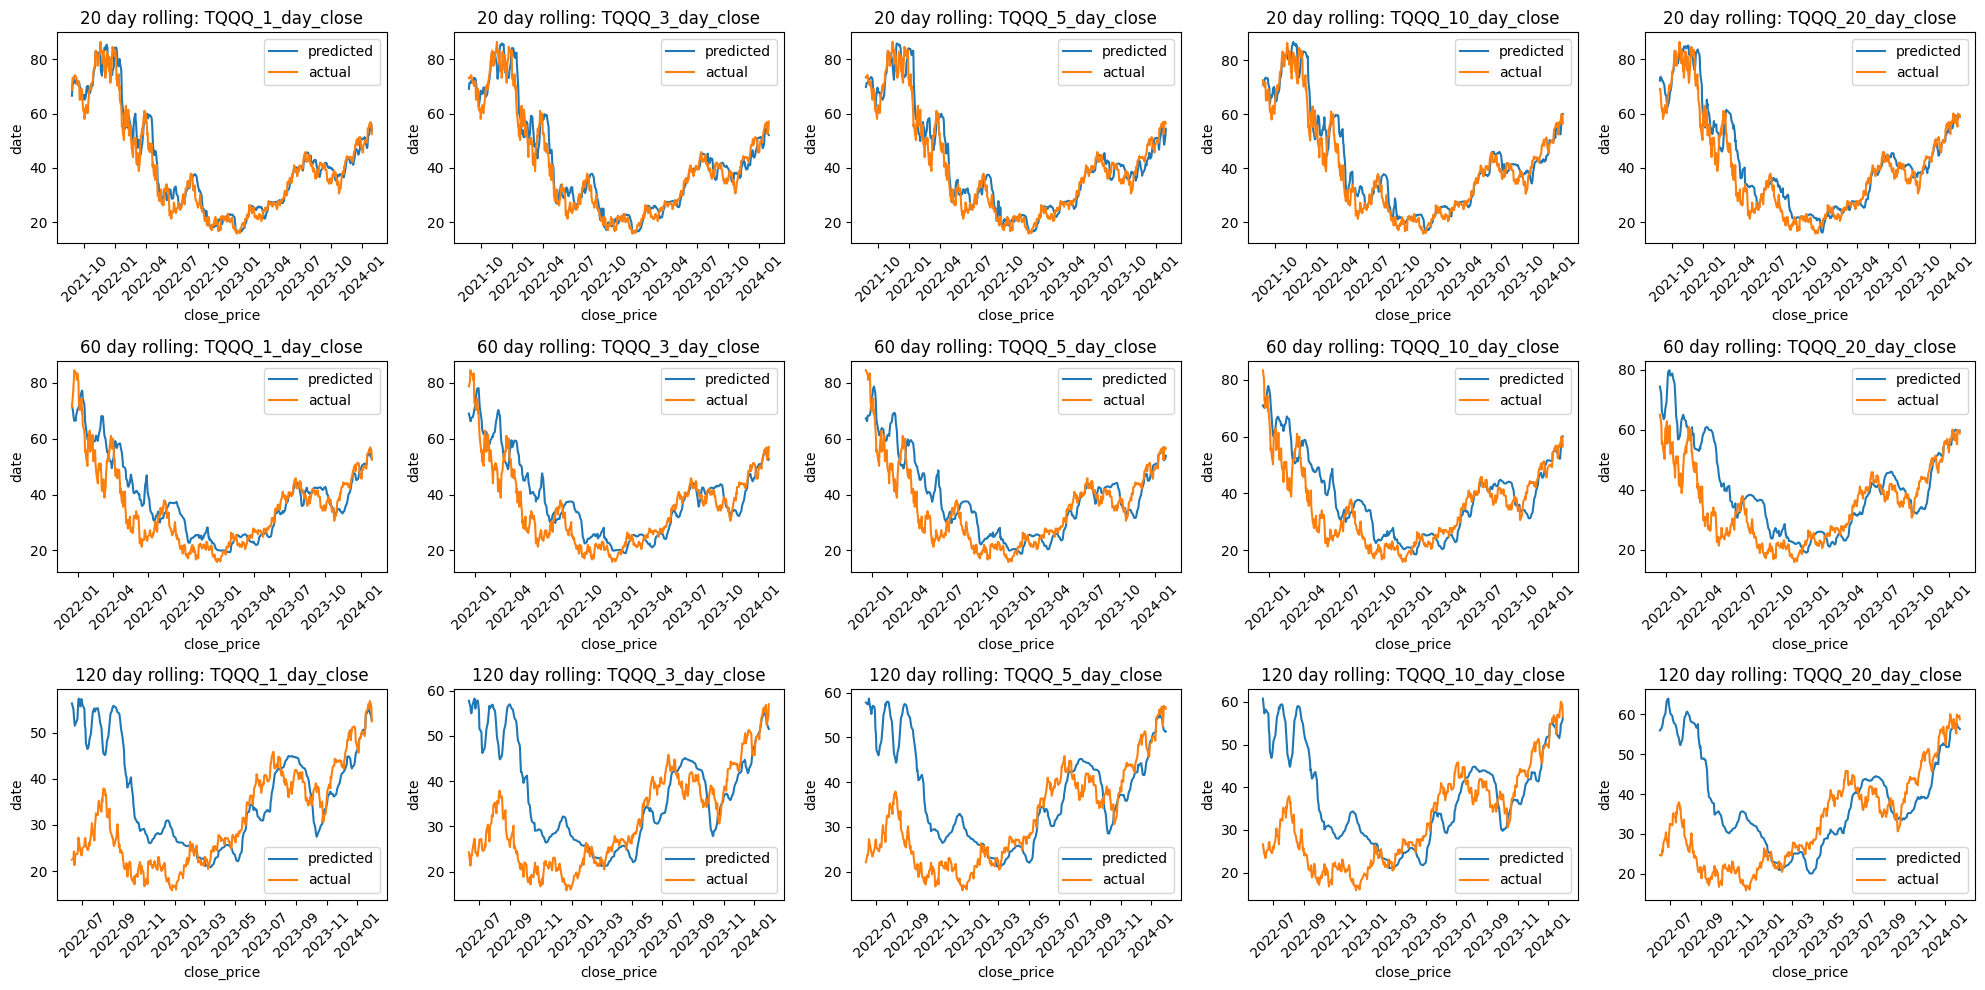

In [138]:
fig, axs = plt.subplots(3, 5, figsize=(20, 10))

for col in range(len(y_pred_20_df_inv_scaled.columns)):
    axs[0, col].plot(
        y_pred_20_df_inv_scaled.iloc[:, col],
        label='predicted'
    )
    axs[0, col].plot(
        y_rnn_test.iloc[-len(y_pred_20_df_inv_scaled):, col],
        label='actual'
    )
    axs[0, col].set_xlabel('close_price')
    axs[0, col].set_ylabel('date')
    axs[0, col].set_title(f'20 day rolling: {y_pred_20_df_inv_scaled.columns[col]}')
    axs[0, col].legend()
    axs[0, col].tick_params(axis='x', rotation=45)

for col in range(len(y_pred_60_df_inv_scaled.columns)):
    axs[1, col].plot(
        y_pred_60_df_inv_scaled.iloc[:, col],
        label='predicted'
    )
    axs[1, col].plot(
        y_rnn_test.iloc[-len(y_pred_60_df_inv_scaled):, col],
        label='actual'
    )
    axs[1, col].set_xlabel('close_price')
    axs[1, col].set_ylabel('date')
    axs[1, col].set_title(f'60 day rolling: {y_pred_60_df_inv_scaled.columns[col]}')
    axs[1, col].legend()
    axs[1, col].tick_params(axis='x', rotation=45)

for col in range(len(y_pred_120_df_inv_scaled.columns)):
    axs[2, col].plot(
        y_pred_120_df_inv_scaled.iloc[:, col],
        label='predicted'
    )
    axs[2, col].plot(
        y_rnn_test.iloc[-len(y_pred_120_df_inv_scaled):, col],
        label='actual'
    )
    axs[2, col].set_xlabel('close_price')
    axs[2, col].set_ylabel('date')
    axs[2, col].set_title(f'120 day rolling: {y_pred_120_df_inv_scaled.columns[col]}')
    axs[2, col].legend()
    axs[2, col].tick_params(axis='x', rotation=45)

# axs.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## Conclusions

We can see from plotting our predicted results as well as with calculating the MSE of the predicted vs actual, the most viable option for predicting future close price of TQQQ is the 20 day rolling window. Although it is not perfect, with a MSE of 0.16, 0.24, 0.29, 0.35 for the 1, 3, 5, 10, and 20 day close, respectively, it is the best among the other options rolling window options.

# Classification Model - XGBClassifier

With the XGBClassifier, we will attempt to predict the specified Buy, Sell, and Hold classifications of our data. 

In [23]:
# label encode dependent variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_xgboost_encoded = label_encoder.fit_transform(y_xgboost)
y_xgboost_encoded = pd.DataFrame(y_xgboost_encoded, columns=['decision'], index=y_xgboost.index)
y_xgboost_encoded

,decision
Date,
2011-10-18,0
2011-10-19,1
2011-10-20,0
2011-10-21,0
2011-10-24,1
...,...
2024-01-24,0
2024-01-25,1
2024-01-26,0


In [9]:
# splitting data between train and test sets
x_xgboost_train = x_xgboost[x_xgboost.index < '2021-06-30']
x_xgboost_test = x_xgboost[x_xgboost.index >= '2021-06-30']

y_xgboost_train = y_xgboost_encoded[y_xgboost_encoded.index < '2021-06-30']
y_xgboost_test = y_xgboost_encoded[y_xgboost_encoded.index >= '2021-06-30']

In [10]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import numpy as np

# define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss')

# define the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv, scoring='accuracy')

# fit GridSearchCV
grid_search.fit(x_xgboost_train, y_xgboost_train)

# best model result
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best cross-validation score: 0.90


In [11]:
# testing model accuracy on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_xgboost_test, y_xgboost_test)
print('test accuracy: {:.2f}'.format(test_accuracy))

test accuracy: 0.92


In [30]:
y_pred = best_model.predict(x_xgboost_test)
y_pred_df = pd.DataFrame(y_pred, columns=['decision'], index=y_xgboost_test.index)
y_pred_df.value_counts()

decision
0           650
Name: count, dtype: int64

In [32]:
y_xgboost_test.value_counts()

decision
0           600
1            37
2            13
Name: count, dtype: int64

## Conclusion

Although the model does show good training and testing accuracy, it does not work. It is a good model, however, our classification data is insufficient. We have a large amount of 0, hold, classified data and very infrequently do we have 1 or 2, buy/sell. Because of this, our model can essentially predict 0 every time, never predict 1 or 2, and still produce greatly accurate results which does not help us attain our goal of timing our investments appropriately for buy, sell, and hold.

# Segmentation Model - KMeans

We will actually be able to use the normalized data from our RNN Timeseries model to segment our data. Our approach here is to determine if certain time periods are segmented as trending downward or trending upward. We migh possibly see some seasonality in the data as well. This will be conducted for each rolling window period of 20, 60, and 120 days similar to how we evaluated our RNN model. However, we will be reviewing silouette scores to determine the best k value to use for our data.

In [55]:
# combine test and train data for kmeans model
x_kmeans_20 = pd.concat([x_rnn_train_normalized_20, x_rnn_test_normalized_20])

x_kmeans_60 = pd.concat([x_rnn_train_normalized_60, x_rnn_test_normalized_60])

x_kmeans_120 = pd.concat([x_rnn_train_normalized_120, x_rnn_test_normalized_120])

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# setting clusters for our kmeans
clusters = [2, 3, 4, 5, 6, 7, 8]

# kmeans for 20 day window
score_20 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_20)
    score = silhouette_score(x_kmeans_20, labels)
    score_20.append(score)

# kmeans for 60 day window
score_60 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_60)
    score = silhouette_score(x_kmeans_60, labels)
    score_60.append(score)

# kmeans for 120 day window
score_120 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_120)
    score = silhouette_score(x_kmeans_120, labels)
    score_120.append(score)

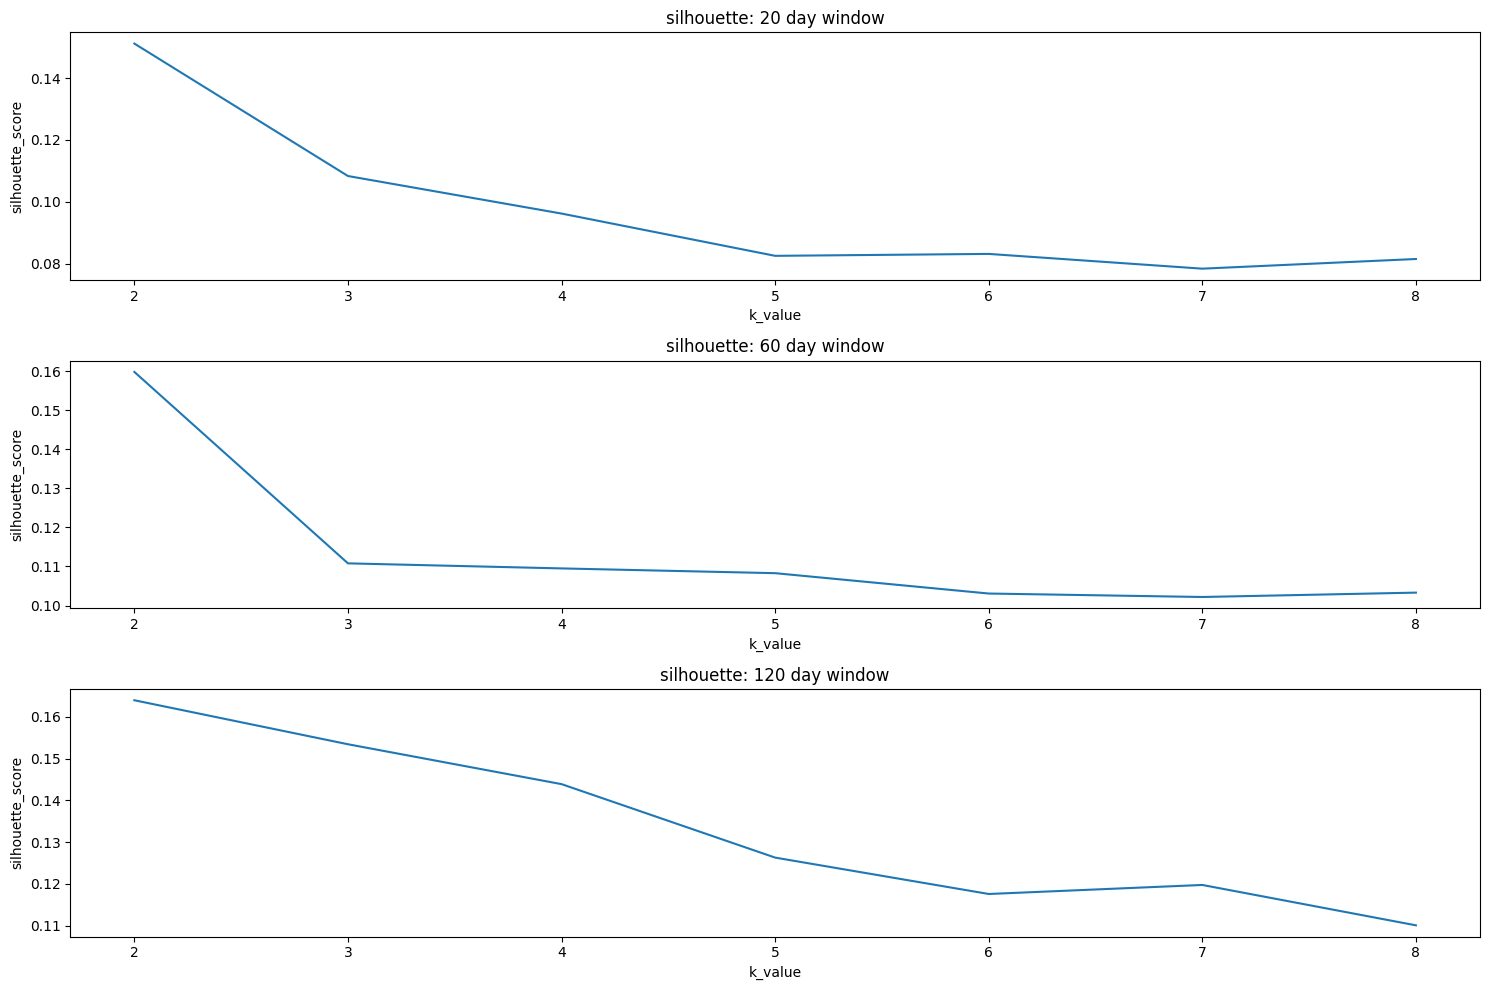

In [65]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(15,10))

axs[0].plot(clusters, score_20)
axs[0].set_title('silhouette: 20 day window')
axs[0].set_ylabel('silhouette_score')
axs[0].set_xlabel('k_value')

axs[1].plot(clusters, score_60)
axs[1].set_title('silhouette: 60 day window')
axs[1].set_ylabel('silhouette_score')
axs[1].set_xlabel('k_value')

axs[2].plot(clusters, score_120)
axs[2].set_title('silhouette: 120 day window')
axs[2].set_ylabel('silhouette_score')
axs[2].set_xlabel('k_value')

plt.tight_layout()
plt.show()

Our silhouette score are not very good. We will try to conduct some dimensionality reduciton using PCA to see if that helps to improve the scores.

#### PCA = 2

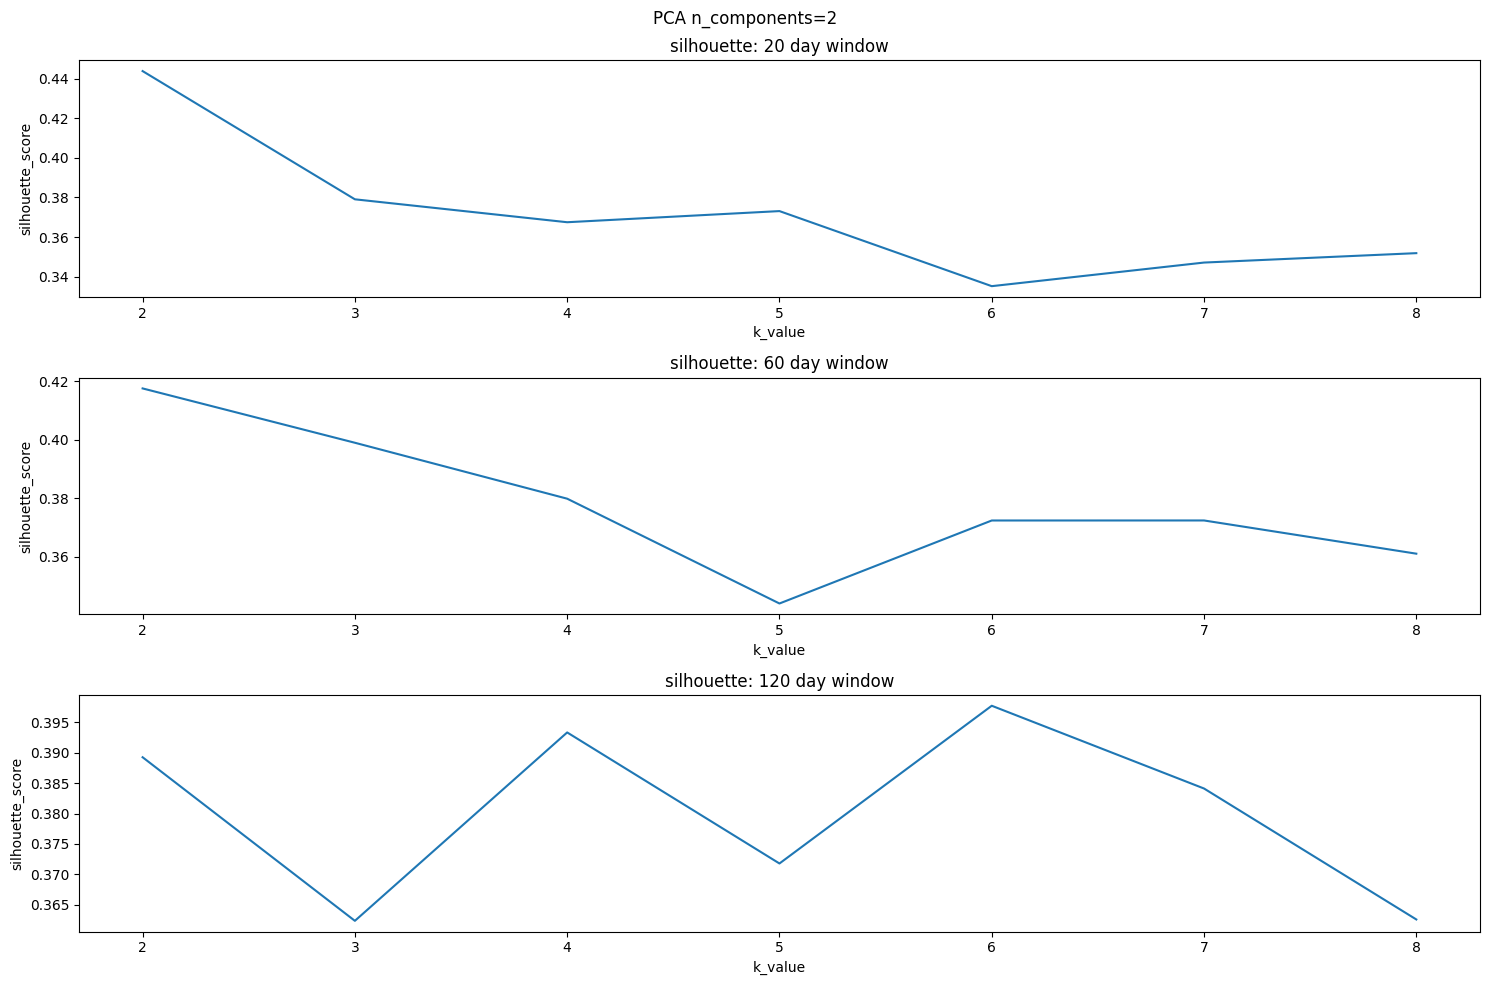

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_kmeans_20_pca2 = pca.fit_transform(x_kmeans_20)
x_kmeans_60_pca2 = pca.fit_transform(x_kmeans_60)
x_kmeans_120_pca2 = pca.fit_transform(x_kmeans_120)

# kmeans for 20 day window
score_20 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_20_pca2)
    score = silhouette_score(x_kmeans_20_pca2, labels)
    score_20.append(score)

# kmeans for 60 day window
score_60 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_60_pca2)
    score = silhouette_score(x_kmeans_60_pca2, labels)
    score_60.append(score)

# kmeans for 120 day window
score_120 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_120_pca2)
    score = silhouette_score(x_kmeans_120_pca2, labels)
    score_120.append(score)

fig, axs = plt.subplots(3, 1, figsize=(15,10))

fig.suptitle('PCA n_components=2')

axs[0].plot(clusters, score_20)
axs[0].set_title('silhouette: 20 day window')
axs[0].set_ylabel('silhouette_score')
axs[0].set_xlabel('k_value')

axs[1].plot(clusters, score_60)
axs[1].set_title('silhouette: 60 day window')
axs[1].set_ylabel('silhouette_score')
axs[1].set_xlabel('k_value')

axs[2].plot(clusters, score_120)
axs[2].set_title('silhouette: 120 day window')
axs[2].set_ylabel('silhouette_score')
axs[2].set_xlabel('k_value')

plt.tight_layout()
plt.show()

#### PCA = 3

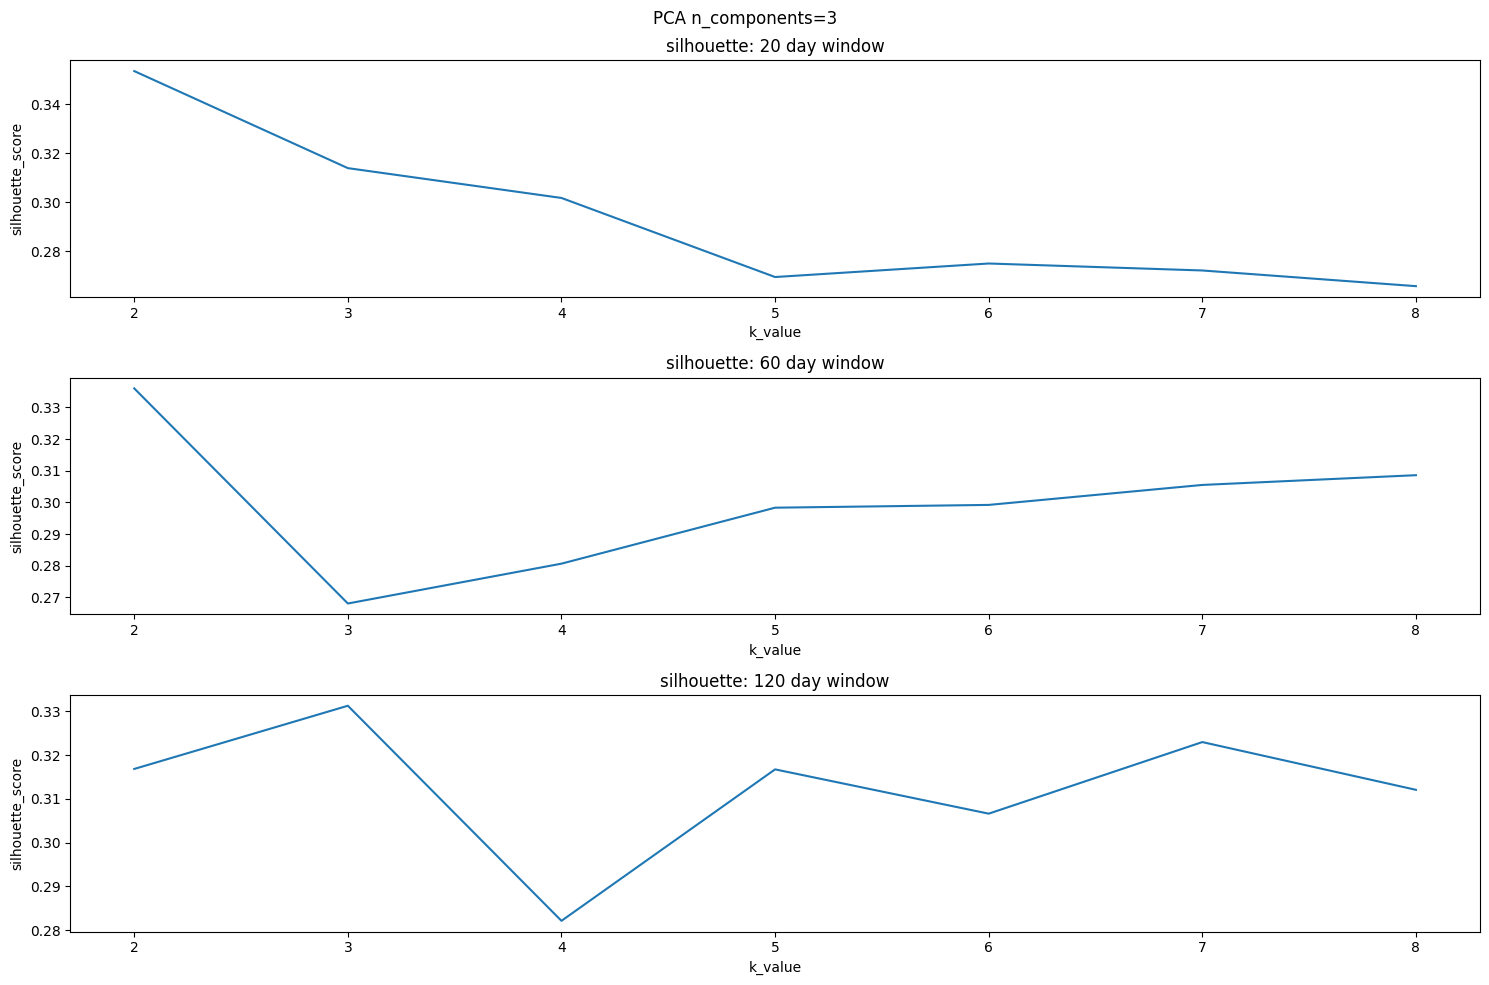

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

x_kmeans_20_pca3 = pca.fit_transform(x_kmeans_20)
x_kmeans_60_pca3 = pca.fit_transform(x_kmeans_60)
x_kmeans_120_pca3 = pca.fit_transform(x_kmeans_120)

# kmeans for 20 day window
score_20 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_20_pca3)
    score = silhouette_score(x_kmeans_20_pca3, labels)
    score_20.append(score)

# kmeans for 60 day window
score_60 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_60_pca3)
    score = silhouette_score(x_kmeans_60_pca3, labels)
    score_60.append(score)

# kmeans for 120 day window
score_120 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_120_pca3)
    score = silhouette_score(x_kmeans_120_pca3, labels)
    score_120.append(score)

fig, axs = plt.subplots(3, 1, figsize=(15,10))

fig.suptitle('PCA n_components=3')

axs[0].plot(clusters, score_20)
axs[0].set_title('silhouette: 20 day window')
axs[0].set_ylabel('silhouette_score')
axs[0].set_xlabel('k_value')

axs[1].plot(clusters, score_60)
axs[1].set_title('silhouette: 60 day window')
axs[1].set_ylabel('silhouette_score')
axs[1].set_xlabel('k_value')

axs[2].plot(clusters, score_120)
axs[2].set_title('silhouette: 120 day window')
axs[2].set_ylabel('silhouette_score')
axs[2].set_xlabel('k_value')

plt.tight_layout()
plt.show()

#### PCA = 4

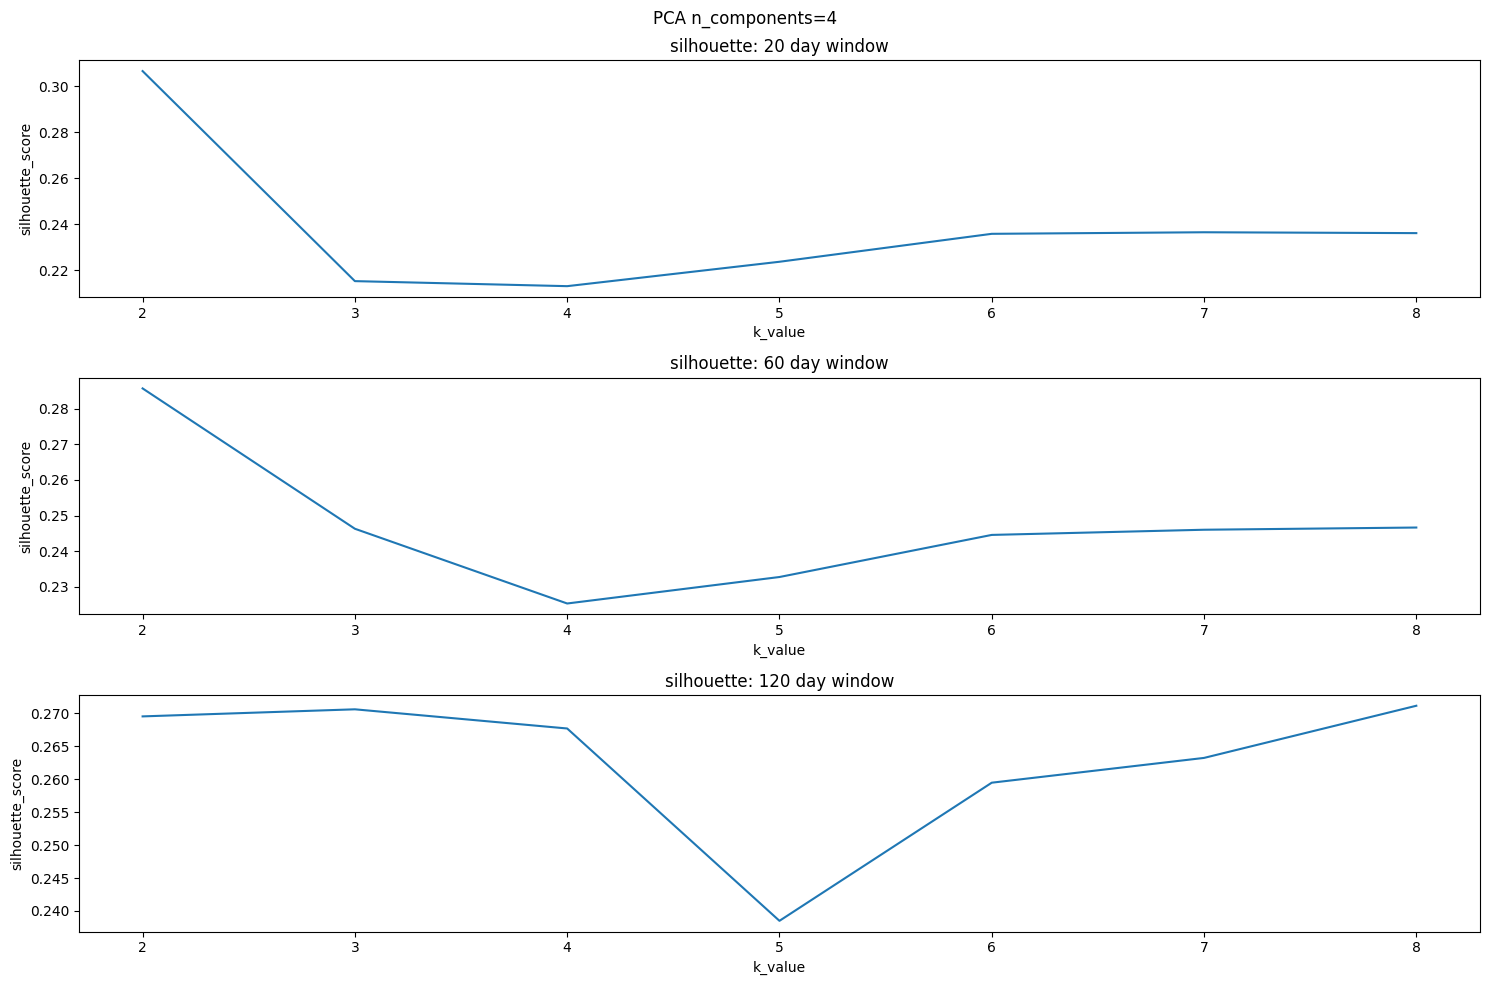

In [114]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

x_kmeans_20_pca4 = pca.fit_transform(x_kmeans_20)
x_kmeans_60_pca4 = pca.fit_transform(x_kmeans_60)
x_kmeans_120_pca4 = pca.fit_transform(x_kmeans_120)

# kmeans for 20 day window
score_20 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_20_pca4)
    score = silhouette_score(x_kmeans_20_pca4, labels)
    score_20.append(score)

# kmeans for 60 day window
score_60 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_60_pca4)
    score = silhouette_score(x_kmeans_60_pca4, labels)
    score_60.append(score)

# kmeans for 120 day window
score_120 = []

for val in clusters:
    kmeans = KMeans(n_clusters=val, random_state=42)
    labels = kmeans.fit_predict(x_kmeans_120_pca4)
    score = silhouette_score(x_kmeans_120_pca4, labels)
    score_120.append(score)

fig, axs = plt.subplots(3, 1, figsize=(15,10))

fig.suptitle('PCA n_components=4')

axs[0].plot(clusters, score_20)
axs[0].set_title('silhouette: 20 day window')
axs[0].set_ylabel('silhouette_score')
axs[0].set_xlabel('k_value')

axs[1].plot(clusters, score_60)
axs[1].set_title('silhouette: 60 day window')
axs[1].set_ylabel('silhouette_score')
axs[1].set_xlabel('k_value')

axs[2].plot(clusters, score_120)
axs[2].set_title('silhouette: 120 day window')
axs[2].set_ylabel('silhouette_score')
axs[2].set_xlabel('k_value')

plt.tight_layout()
plt.show()

PCA has done the trick and increased our silhouette scores. Although we would like to see scores near or above 0.5, we still have a promising view of some defined clusters in our data. Based on these scores, I would choose PCA = 2 on a 60 day window with k = 3. Lets dive deeper into the data to understand where these clusters might make sense.

In [79]:
# produce the kmeans labels
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(x_kmeans_60_pca2)

In [80]:
labels_df = pd.DataFrame(labels, columns=['cluster'], index=x_kmeans_60.index)
labels_df

,cluster
Date,
2012-01-12,0
2012-01-13,0
2012-01-17,0
2012-01-18,0
2012-01-19,2
...,...
2024-01-24,2
2024-01-25,2
2024-01-26,2


In [82]:
labels_df.value_counts()

cluster
2          1533
1           953
0           486
Name: count, dtype: int64

In [87]:
x_kmeans = x_rnn.merge(labels_df, left_index=True, right_index=True)
x_kmeans

,TQQQ_close,TQQQ_volume,TQQQ_ret,tbf_close,tbf_volume,tbf_ret,tip_close,tip_volume,tip_ret,uup_close,...,uso_ret,gld_close,gld_volume,gld_ret,TQQQ_35_day_ema,TQQQ_200_day_sma,TQQQ_macd,TQQQ_macd_signal,TQQQ_rsi,cluster
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-12,0.786101,77164800,0.011863,28.852890,293400,0.000000,88.739655,754600,-0.001533,20.378904,...,-0.022097,160.380005,8602500,0.004447,0.719701,0.763792,0.020723,0.010112,81.866224,0
2012-01-13,0.777087,77577600,-0.011467,28.587259,447000,-0.009206,88.989433,1052100,0.002815,20.541431,...,0.002627,159.259995,8910300,-0.006983,0.722889,0.763386,0.021779,0.012446,76.253177,0
2012-01-17,0.797950,64512000,0.026847,28.477343,541000,-0.003845,89.080261,983600,0.001021,20.469196,...,0.016509,160.500000,8313300,0.007786,0.727059,0.763066,0.024022,0.014761,76.664545,0
2012-01-18,0.829649,106915200,0.039726,28.825411,264100,0.012223,89.012093,732700,-0.000765,20.288612,...,0.001031,161.600006,9341200,0.006854,0.732758,0.762898,0.028035,0.017416,79.544066,0
2012-01-19,0.846258,113395200,0.020020,29.210114,443600,0.013346,88.686684,784100,-0.003656,20.180262,...,-0.003606,161.220001,8114200,-0.002352,0.739064,0.762852,0.032184,0.020370,89.843274,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,56.117512,89859300,0.016423,23.338676,360500,0.005991,106.405571,1282300,-0.002343,27.700001,...,0.012633,186.399994,6085400,-0.008247,48.955955,38.880088,2.173864,1.641696,87.165784,2
2024-01-25,56.276936,75697600,0.002841,23.209623,671500,-0.005530,106.765350,1717800,0.003381,27.780001,...,0.023958,187.139999,4651000,0.003970,49.362677,39.026614,2.333495,1.780056,92.782685,2
2024-01-26,55.240677,64191300,-0.018414,23.249332,173100,0.001711,106.665413,1706300,-0.000936,27.780001,...,0.012045,187.009995,5064800,-0.000695,49.689232,39.170570,2.349305,1.893906,85.457289,2


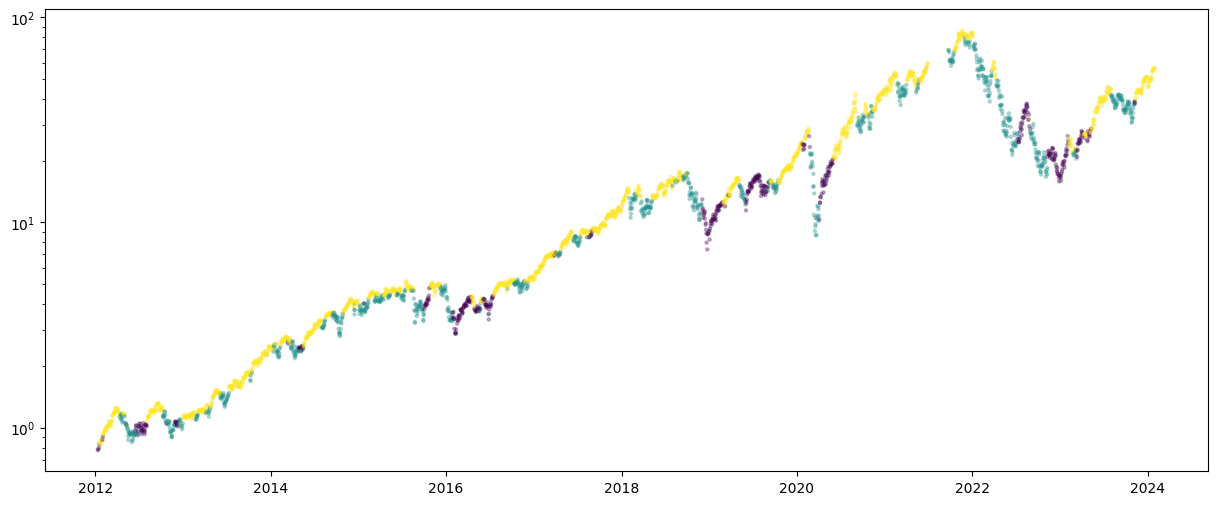

In [105]:
plt.figure(figsize=(15, 6))
plt.scatter(
    x_kmeans.index,
    x_kmeans['TQQQ_close'],
    s=5,
    c=x_kmeans['cluster'],
    label=x_kmeans['cluster'],
    alpha=0.3
)

plt.yscale('log')
plt.show()

It seems that the kmeans clustering algorith has clustered the data as being in an upward trend or downward trend. However, I am unsure what the purple exactly represents. It looks to maybe represent the valeys and peaks before a transition in the upward or downward trend begin. I will take another look more closely at a specific snapshot of the data to see if that brings more insight.

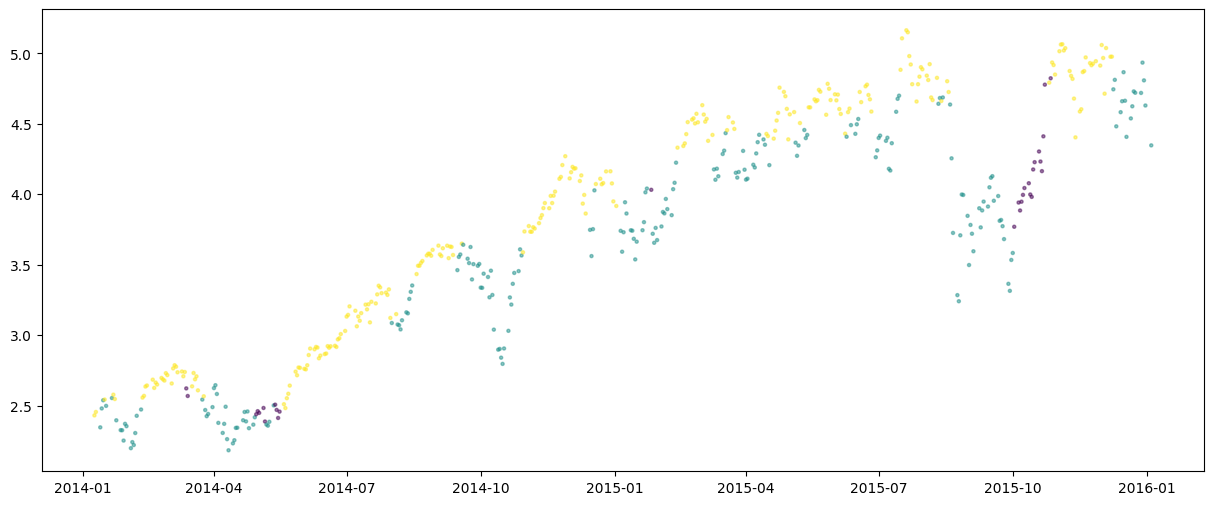

In [110]:
plt.figure(figsize=(15, 6))
plt.scatter(
    x_kmeans.index[500:1000],
    x_kmeans['TQQQ_close'][500:1000],
    s=5,
    c=x_kmeans['cluster'][500:1000],
    label=x_kmeans['cluster'][500:1000],
    alpha=0.5
)

# plt.yscale('log')
plt.show()

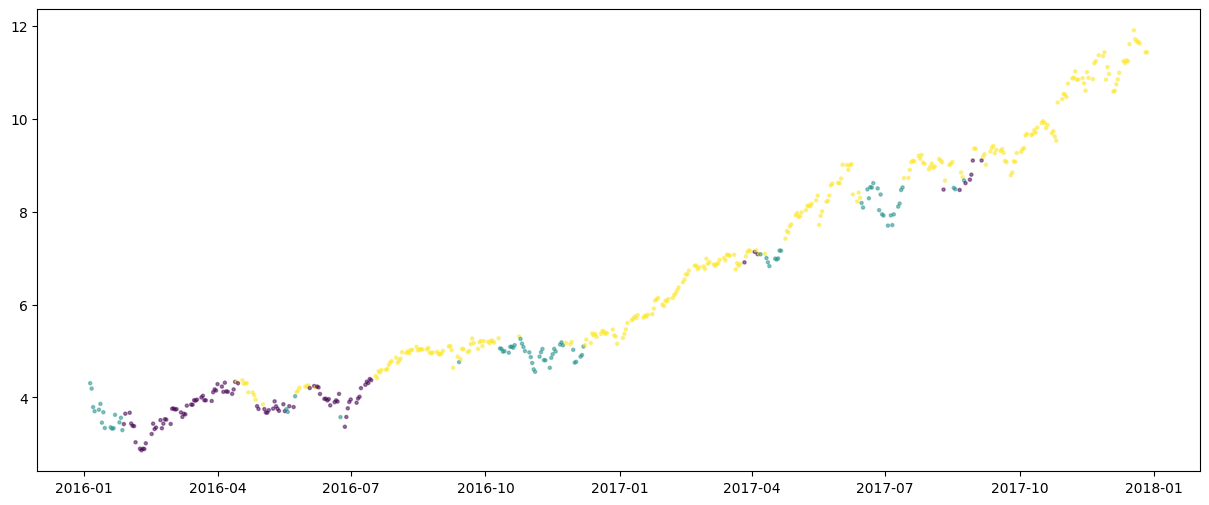

In [111]:
plt.figure(figsize=(15, 6))
plt.scatter(
    x_kmeans.index[1000:1500],
    x_kmeans['TQQQ_close'][1000:1500],
    s=5,
    c=x_kmeans['cluster'][1000:1500],
    label=x_kmeans['cluster'][1000:1500],
    alpha=0.5
)

# plt.yscale('log')
plt.show()

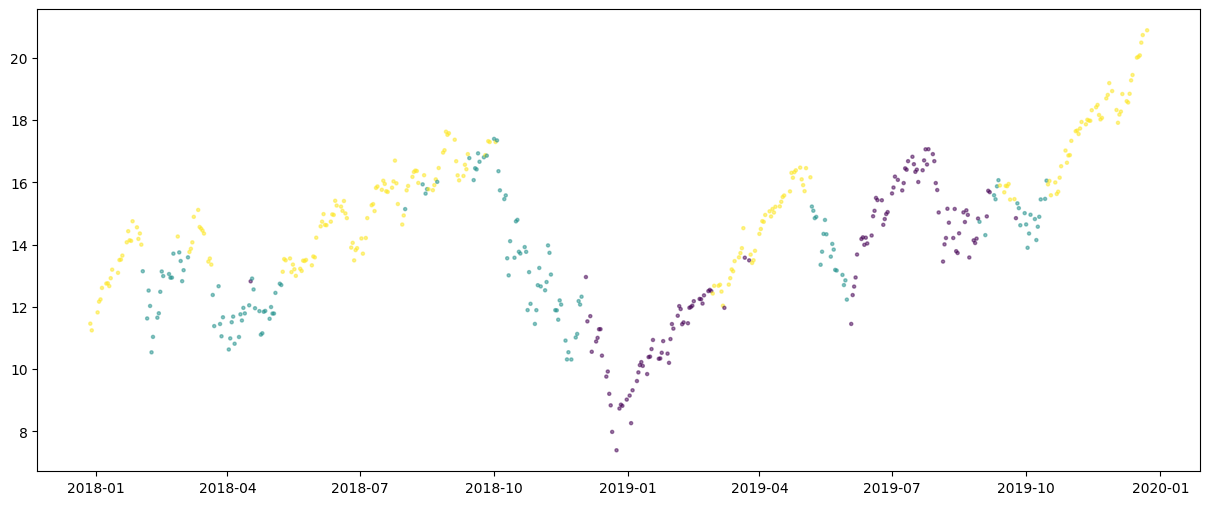

In [113]:
plt.figure(figsize=(15, 6))
plt.scatter(
    x_kmeans.index[1500:2000],
    x_kmeans['TQQQ_close'][1500:2000],
    s=5,
    c=x_kmeans['cluster'][1500:2000],
    label=x_kmeans['cluster'][1500:2000],
    alpha=0.5
)

# plt.yscale('log')
plt.show()

After reviewing these charts, I believe that the 3rd cluster, in purple, actually does not represent anything significant. Looking back we should actually just go with a PCA = 2 and k = 2 model.

cluster
0          1817
1          1155
Name: count, dtype: int64


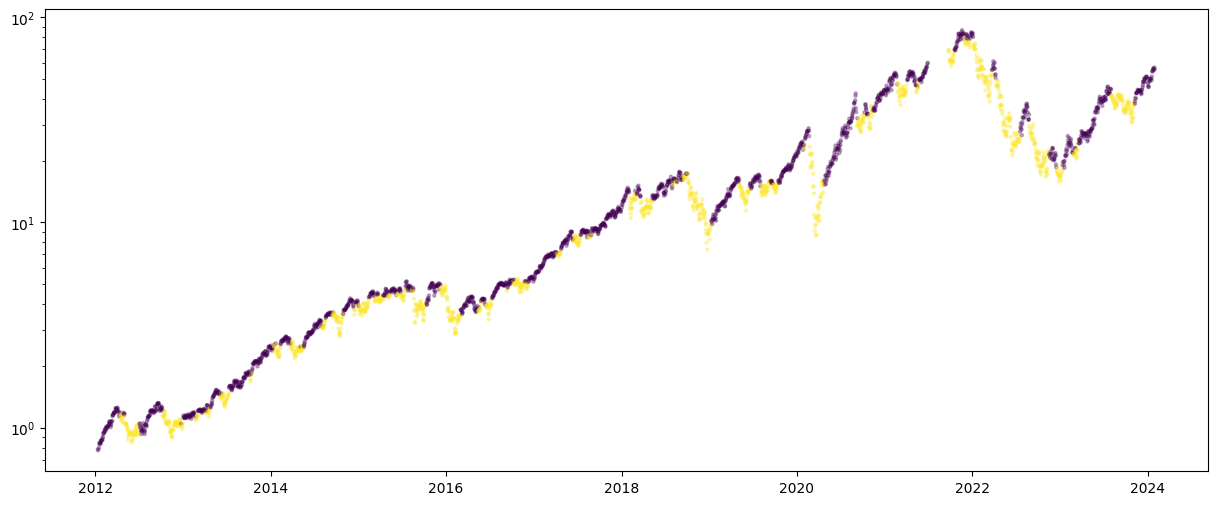

In [115]:
# produce the kmeans labels
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(x_kmeans_60_pca2)

labels_df = pd.DataFrame(labels, columns=['cluster'], index=x_kmeans_60.index)
labels_df

x_kmeans = x_rnn.merge(labels_df, left_index=True, right_index=True)
x_kmeans

print(labels_df.value_counts())

plt.figure(figsize=(15, 6))
plt.scatter(
    x_kmeans.index,
    x_kmeans['TQQQ_close'],
    s=5,
    c=x_kmeans['cluster'],
    label=x_kmeans['cluster'],
    alpha=0.3
)

plt.yscale('log')
plt.show()

## Conclusion

This actually looks fantastic, we can see that the kmeans model is clustering the price at the times when the the etf is in an uptrend and reclassifies when it is in a down trend which is exactly what we were hoping for in the model.